<a href="https://colab.research.google.com/github/Riyasingh22600/ml-fundamentals-assignment/blob/main/ch1-2_notes/ch3_numpy_pandas/ch4_eda/ch5_feature_engineering/ch6_models/ch6_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6: Machine Learning Models

---

Dataset Overview:
Dataset shape: (1500, 12)
Features: ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'categorical_1_A', 'categorical_1_B', 'categorical_1_C', 'categorical_2_X', 'categorical_2_Y']
Regression target range: -7.86 to 12.87
Classification target distribution:
classification_target
Medium    1052
High       266
Low        182
Name: count, dtype: int64

Training set size: (1200, 10)
Test set size: (300, 10)

REGRESSION ALGORITHMS

Training Linear Regression...
 Test R2: 0.9802
 Test MSE: 0.2449
 CV R2 Mean: 0.9755 (±0.0045)

Training Ridge Regression...
 Test R2: 0.9802
 Test MSE: 0.2451
 CV R2 Mean: 0.9755 (±0.0045)

Training Lasso Regression...
 Test R2: 0.9750
 Test MSE: 0.3094
 CV R2 Mean: 0.9703 (±0.0042)

Training Elastic Net...
 Test R2: 0.9731
 Test MSE: 0.3326
 CV R2 Mean: 0.9694 (±0.0043)

Training Decision Tree...
 Test R2: 0.8633
 Test MSE: 1.6925
 CV R2 Mean: 0.8429 (±0.0082)

Training Random Forest...
 Test R2: 0.9445
 Test MSE: 0.6871
 CV R2 

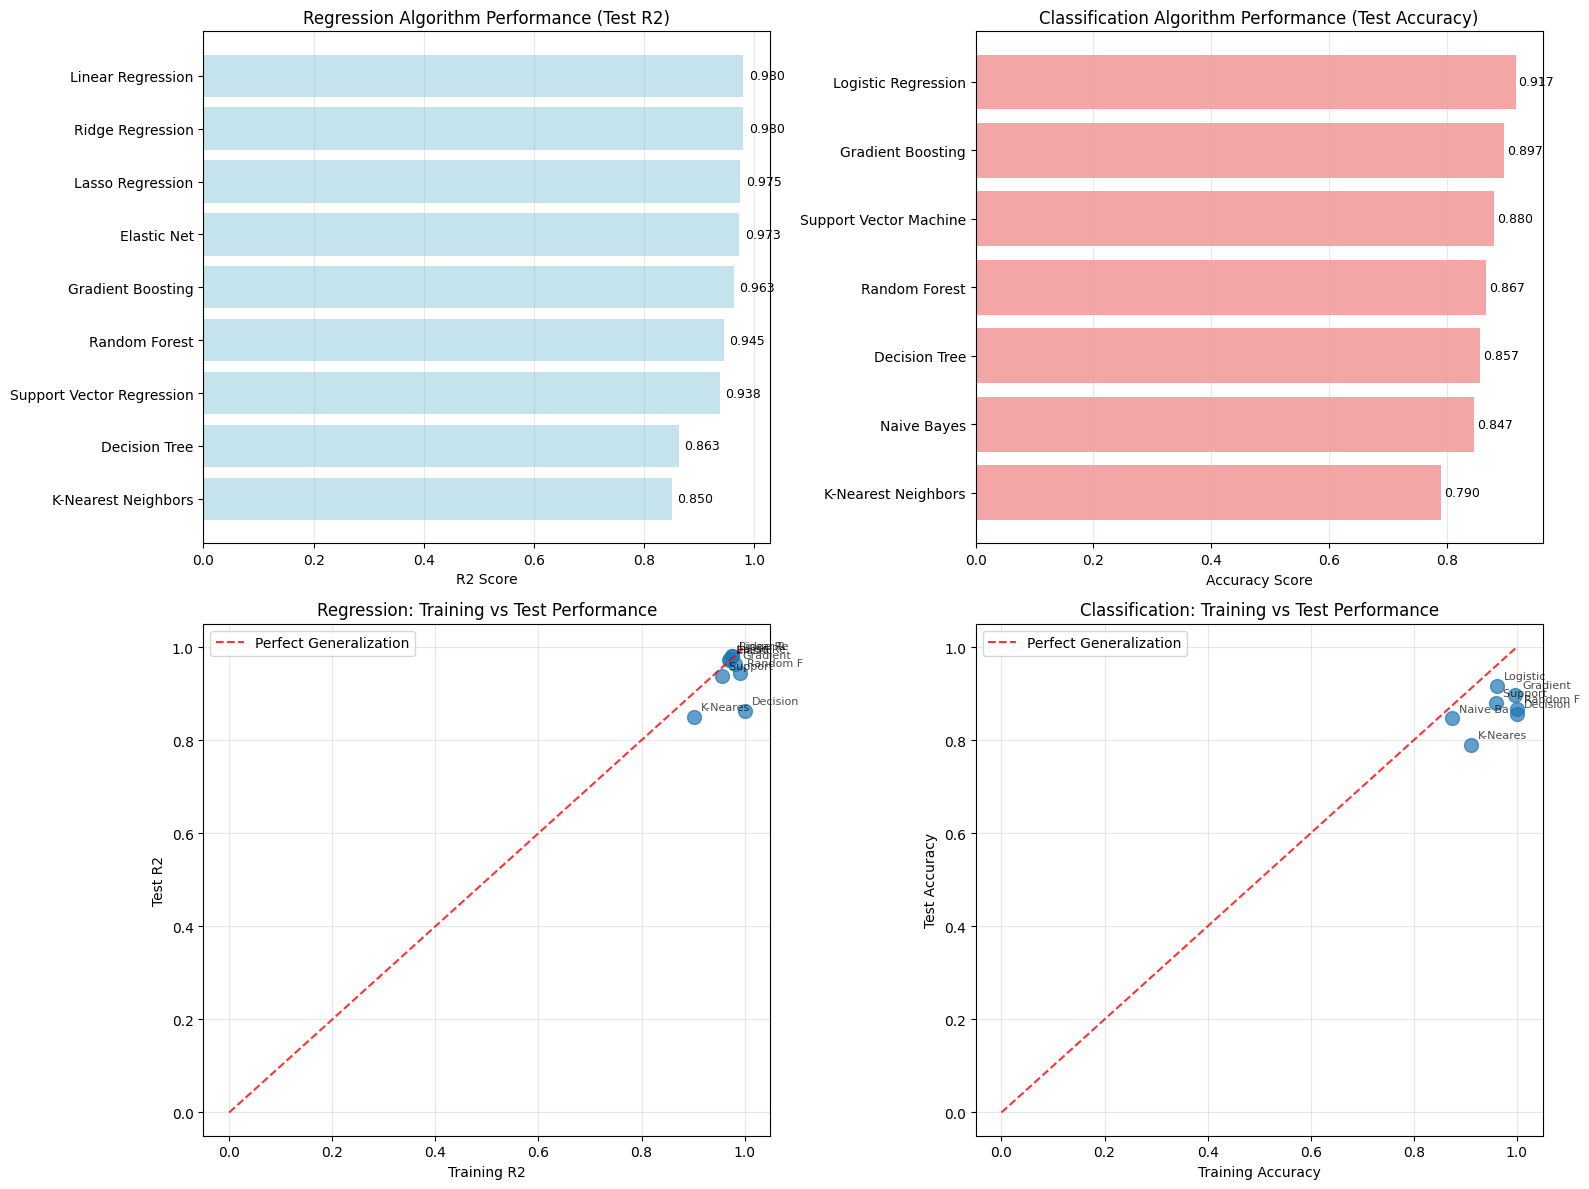


FEATURE IMPORTANCE ANALYSIS
Feature Importance from Random Forest:
        Feature  Regression_Importance  Classification_Importance
      feature_2                 0.4824                     0.3514
      feature_1                 0.4092                     0.3400
      feature_3                 0.0538                     0.1076
      feature_4                 0.0292                     0.0845
      feature_5                 0.0199                     0.0806
categorical_1_C                 0.0013                     0.0084
categorical_1_A                 0.0013                     0.0077
categorical_1_B                 0.0012                     0.0074
categorical_2_X                 0.0009                     0.0068
categorical_2_Y                 0.0009                     0.0055


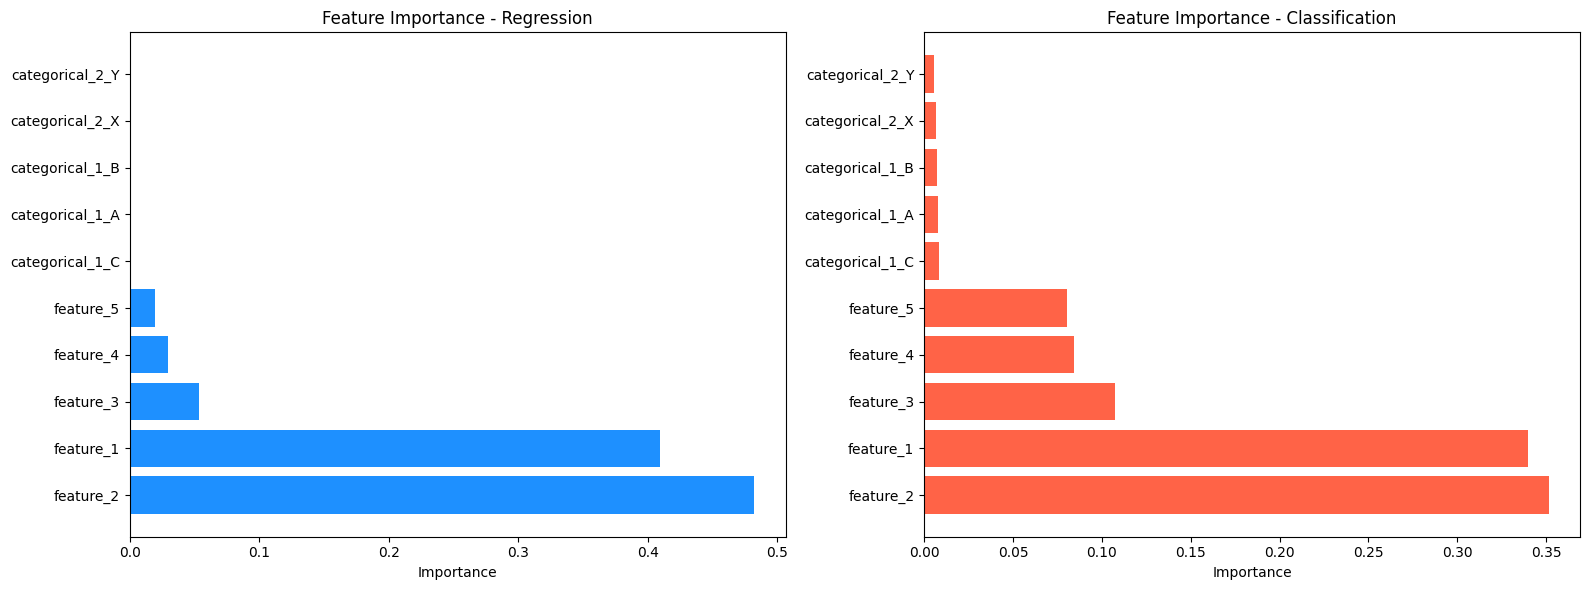


ALGORITHM SELECTION GUIDELINES
When to use each algorithm:
----------------------------------------
Linear Regression:
 Best for: Linear relationships, interpretability, baseline model

Ridge/Lasso:
 Best for: Regularization, feature selection (Lasso), multicollinearity

Decision Trees:
 Best for: Interpretability, non-linear patterns, handling missing values

Random Forest:
 Best for: Robust performance, feature importance, handling noise

Gradient Boosting:
 Best for: High performance, complex patterns, competitions

SVM:
 Best for: High-dimensional data, non-linear patterns with kernels

KNN:
 Best for: Simple implementation, local patterns, recommendation systems

Naive Bayes:
 Best for: Text classification, categorical features, speed

ALGORITHM COMPARISON SUMMARY
Best Regression Algorithm: Linear Regression (R2 = 0.9802)
Best Classification Algorithm: Logistic Regression (Accuracy = 0.9167)

Key Takeaways:
1. Tree-based models (Random Forest, Gradient Boosting) often perform wel

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Create comprehensive dataset
np.random.seed(42)
n_samples = 1500

# Generate features
data = {
    'feature_1': np.random.normal(0, 1, n_samples),
    'feature_2': np.random.normal(2, 1.5, n_samples),
    'feature_3': np.random.exponential(1, n_samples),
    'feature_4': np.random.uniform(-2, 2, n_samples),
    'feature_5': np.random.gamma(2, 1, n_samples),
    'categorical_1': np.random.choice(['A', 'B', 'C'], n_samples),
    'categorical_2': np.random.choice(['X', 'Y'], n_samples, p=[0.3, 0.7])
}
df = pd.DataFrame(data)

# Create regression target (continuous)
regression_target = (
    2 * df['feature_1'] +
    1.5 * df['feature_2'] +
    -0.8 * df['feature_3'] +
    0.5 * df['feature_4'] +
    0.3 * df['feature_5'] +
    np.random.normal(0, 0.5, n_samples) # Add noise
)

# Create classification target (categorical)
classification_target = pd.cut(
    regression_target,
    bins=3,
    labels=['Low', 'Medium', 'High']
)

df['regression_target'] = regression_target
df['classification_target'] = classification_target

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['categorical_1', 'categorical_2'])

print("Dataset Overview:")
print("="*50)
print(f"Dataset shape: {df_encoded.shape}")
print(f"Features: {[col for col in df_encoded.columns if 'target' not in col]}")
print(f"Regression target range: {df['regression_target'].min():.2f} to {df['regression_target'].max():.2f}")
print(f"Classification target distribution:\n{df['classification_target'].value_counts()}")

# Prepare features and targets
feature_columns = [col for col in df_encoded.columns if 'target' not in col]
X = df_encoded[feature_columns]
y_reg = df_encoded['regression_target']
y_class = df['classification_target']

# Split data
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"\nTraining set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")

# REGRESSION ALGORITHMS
print("\n" + "="*60)
print("REGRESSION ALGORITHMS")
print("="*60)
# Define regression algorithms
regression_algorithms = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}
# Train and evaluate regression models
regression_results = []
for name, algorithm in regression_algorithms.items():
    print(f"\nTraining {name}...")
    # Train model
    algorithm.fit(X_train_scaled, y_train_reg)
    # Make predictions
    y_pred_train = algorithm.predict(X_train_scaled)
    y_pred_test = algorithm.predict(X_test_scaled)
    # Calculate metrics
    train_mse = mean_squared_error(y_train_reg, y_pred_train)
    test_mse = mean_squared_error(y_test_reg, y_pred_test)
    train_r2 = r2_score(y_train_reg, y_pred_train)
    test_r2 = r2_score(y_test_reg, y_pred_test)
    # Cross-validation
    cv_scores = cross_val_score(algorithm, X_train_scaled, y_train_reg, cv=5, scoring='r2')
    results = {
        'Algorithm': name,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'CV R2 Mean': cv_scores.mean(),
        'CV R2 Std': cv_scores.std()
    }
    regression_results.append(results)
    print(f" Test R2: {test_r2:.4f}")
    print(f" Test MSE: {test_mse:.4f}")
    print(f" CV R2 Mean: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
# Display regression results
regression_df = pd.DataFrame(regression_results)
print(f"\nRegression Results Summary:")
print("="*80)
print(regression_df.round(4).to_string(index=False))

# CLASSIFICATION ALGORITHMS
print("\n" + "="*60)
print("CLASSIFICATION ALGORITHMS")
print("="*60)
# Encode target for classification
le = LabelEncoder()
y_train_class_encoded = le.fit_transform(y_train_class)
y_test_class_encoded = le.transform(y_test_class)
# Define classification algorithms
classification_algorithms = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}
# Train and evaluate classification models
classification_results = []
for name, algorithm in classification_algorithms.items():
    print(f"\nTraining {name}...")
    # Train model
    algorithm.fit(X_train_scaled, y_train_class_encoded)
    # Make predictions
    y_pred_train = algorithm.predict(X_train_scaled)
    y_pred_test = algorithm.predict(X_test_scaled)
    # Calculate metrics
    train_accuracy = accuracy_score(y_train_class_encoded, y_pred_train)
    test_accuracy = accuracy_score(y_test_class_encoded, y_pred_test)
    # Cross-validation
    cv_scores = cross_val_score(algorithm, X_train_scaled, y_train_class_encoded, cv=5, scoring='accuracy')
    results = {
        'Algorithm': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'CV Accuracy Mean': cv_scores.mean(),
        'CV Accuracy Std': cv_scores.std()
    }
    classification_results.append(results)
    print(f" Test Accuracy: {test_accuracy:.4f}")
    print(f" CV Accuracy Mean: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
# Display classification results
classification_df = pd.DataFrame(classification_results)
print(f"\nClassification Results Summary:")
print("="*70)
print(classification_df.round(4).to_string(index=False))

# DETAILED MODEL ANALYSIS
print("\n" + "="*60)
print("DETAILED MODEL ANALYSIS")
print("="*60)
# Get best models
best_regression = regression_df.loc[regression_df['Test R2'].idxmax()]
best_classification = classification_df.loc[classification_df['Test Accuracy'].idxmax()]
print(f"Best Regression Model: {best_regression['Algorithm']}")
print(f" - Test R2: {best_regression['Test R2']:.4f}")
print(f" - Test MSE: {best_regression['Test MSE']:.4f}")
print(f"\nBest Classification Model: {best_classification['Algorithm']}")
print(f" - Test Accuracy: {best_classification['Test Accuracy']:.4f}")

# Detailed analysis of best classification model
best_class_name = best_classification['Algorithm']
best_class_model = classification_algorithms[best_class_name]
best_class_model.fit(X_train_scaled, y_train_class_encoded)
y_pred_best = best_class_model.predict(X_test_scaled)
print(f"\nDetailed Classification Report for {best_class_name}:")
print("-" * 50)
target_names = le.classes_
print(classification_report(y_test_class_encoded, y_pred_best, target_names=target_names))
# Confusion matrix
cm = confusion_matrix(y_test_class_encoded, y_pred_best)
print(f"\nConfusion Matrix for {best_class_name}:")
print(cm)

# HYPERPARAMETER TUNING EXAMPLE
print("\n" + "="*60)
print("HYPERPARAMETER TUNING EXAMPLE")
print("="*60)
# Tune Random Forest (both regression and classification)
print("Tuning Random Forest Regressor...")
rf_reg_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}
rf_reg = RandomForestRegressor(random_state=42)
rf_reg_grid = GridSearchCV(rf_reg, rf_reg_params, cv=5, scoring='r2', n_jobs=-1)
rf_reg_grid.fit(X_train_scaled, y_train_reg)
print(f"Best parameters: {rf_reg_grid.best_params_}")
print(f"Best CV score: {rf_reg_grid.best_score_:.4f}")
# Test tuned model
rf_reg_tuned_pred = rf_reg_grid.predict(X_test_scaled)
rf_reg_tuned_r2 = r2_score(y_test_reg, rf_reg_tuned_pred)
print(f"Tuned model Test R2: {rf_reg_tuned_r2:.4f}")

print("\nTuning Random Forest Classifier...")
rf_class_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}
rf_class = RandomForestClassifier(random_state=42)
rf_class_grid = GridSearchCV(rf_class, rf_class_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_class_grid.fit(X_train_scaled, y_train_class_encoded)
print(f"Best parameters: {rf_class_grid.best_params_}")
print(f"Best CV score: {rf_class_grid.best_score_:.4f}")
# Test tuned model
rf_class_tuned_pred = rf_class_grid.predict(X_test_scaled)
rf_class_tuned_acc = accuracy_score(y_test_class_encoded, rf_class_tuned_pred)
print(f"Tuned model Test Accuracy: {rf_class_tuned_acc:.4f}")

# VISUALIZATION
print("\n" + "="*60)
print("ALGORITHM PERFORMANCE VISUALIZATION")
print("="*60)
# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# 1. Regression R2 scores
reg_scores = regression_df.sort_values('Test R2', ascending=True)
axes[0, 0].barh(range(len(reg_scores)), reg_scores['Test R2'], color='lightblue', alpha=0.7)
axes[0, 0].set_yticks(range(len(reg_scores)))
axes[0, 0].set_yticklabels(reg_scores['Algorithm'], fontsize=10)
axes[0, 0].set_xlabel('R2 Score')
axes[0, 0].set_title('Regression Algorithm Performance (Test R2)')
axes[0, 0].grid(axis='x', alpha=0.3)
# Add value labels
for i, v in enumerate(reg_scores['Test R2']):
    axes[0, 0].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)
# 2. Classification accuracy scores
class_scores = classification_df.sort_values('Test Accuracy', ascending=True)
axes[0, 1].barh(range(len(class_scores)), class_scores['Test Accuracy'], color='lightcoral', alpha=0.7)
axes[0, 1].set_yticks(range(len(class_scores)))
axes[0, 1].set_yticklabels(class_scores['Algorithm'], fontsize=10)
axes[0, 1].set_xlabel('Accuracy Score')
axes[0, 1].set_title('Classification Algorithm Performance (Test Accuracy)')
axes[0, 1].grid(axis='x', alpha=0.3)
# Add value labels
for i, v in enumerate(class_scores['Test Accuracy']):
    axes[0, 1].text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)
# 3. Regression: Train vs Test performance
axes[1, 0].scatter(regression_df['Train R2'], regression_df['Test R2'], s=100, alpha=0.7, zorder=2)
axes[1, 0].plot([0, 1], [0, 1], 'r--', alpha=0.8, label='Perfect Generalization')
axes[1, 0].set_xlabel('Training R2')
axes[1, 0].set_ylabel('Test R2')
axes[1, 0].set_title('Regression: Training vs Test Performance')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)
# Add algorithm labels
for i, row in regression_df.iterrows():
    axes[1, 0].annotate(row['Algorithm'][:8],
                        (row['Train R2'], row['Test R2']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, alpha=0.7)
# 4. Classification: Train vs Test performance
axes[1, 1].scatter(classification_df['Train Accuracy'], classification_df['Test Accuracy'], s=100, alpha=0.7, zorder=2)
axes[1, 1].plot([0, 1], [0, 1], 'r--', alpha=0.8, label='Perfect Generalization')
axes[1, 1].set_xlabel('Training Accuracy')
axes[1, 1].set_ylabel('Test Accuracy')
axes[1, 1].set_title('Classification: Training vs Test Performance')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)
# Add algorithm labels
for i, row in classification_df.iterrows():
    axes[1, 1].annotate(row['Algorithm'][:8],
                        (row['Train Accuracy'], row['Test Accuracy']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, alpha=0.7)
plt.tight_layout()
plt.show()

# FEATURE IMPORTANCE ANALYSIS (for tree-based models)
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)
# Get feature importance from Random Forest models
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_model.fit(X_train_scaled, y_train_reg)
rf_class_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class_model.fit(X_train_scaled, y_train_class_encoded)
# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Regression_Importance': rf_reg_model.feature_importances_,
    'Classification_Importance': rf_class_model.feature_importances_
}).sort_values('Regression_Importance', ascending=False)
print("Feature Importance from Random Forest:")
print(feature_importance_df.round(4).to_string(index=False))
# Plot feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Regression feature importance
ax1.barh(range(len(feature_importance_df)), feature_importance_df['Regression_Importance'], color='dodgerblue')
ax1.set_yticks(range(len(feature_importance_df)))
ax1.set_yticklabels(feature_importance_df['Feature'])
ax1.set_xlabel('Importance')
ax1.set_title('Feature Importance - Regression')
# Classification feature importance
feature_importance_df_class = feature_importance_df.sort_values('Classification_Importance', ascending=False)
ax2.barh(range(len(feature_importance_df_class)), feature_importance_df_class['Classification_Importance'], color='tomato')
ax2.set_yticks(range(len(feature_importance_df_class)))
ax2.set_yticklabels(feature_importance_df_class['Feature'])
ax2.set_xlabel('Importance')
ax2.set_title('Feature Importance - Classification')
plt.tight_layout()
plt.show()

# ALGORITHM SELECTION GUIDELINES
print("\n" + "="*60)
print("ALGORITHM SELECTION GUIDELINES")
print("="*60)
guidelines = {
    "Linear Regression": "Best for: Linear relationships, interpretability, baseline model",
    "Ridge/Lasso": "Best for: Regularization, feature selection (Lasso), multicollinearity",
    "Decision Trees": "Best for: Interpretability, non-linear patterns, handling missing values",
    "Random Forest": "Best for: Robust performance, feature importance, handling noise",
    "Gradient Boosting": "Best for: High performance, complex patterns, competitions",
    "SVM": "Best for: High-dimensional data, non-linear patterns with kernels",
    "KNN": "Best for: Simple implementation, local patterns, recommendation systems",
    "Naive Bayes": "Best for: Text classification, categorical features, speed"
}
print("When to use each algorithm:")
print("-" * 40)
for algorithm, guideline in guidelines.items():
    print(f"{algorithm}:")
    print(f" {guideline}")
    print()
# FINAL SUMMARY
print("="*60)
print("ALGORITHM COMPARISON SUMMARY")
print("="*60)
print(f"Best Regression Algorithm: {best_regression['Algorithm']} (R2 = {best_regression['Test R2']:.4f})")
print(f"Best Classification Algorithm: {best_classification['Algorithm']} (Accuracy = {best_classification['Test Accuracy']:.4f})")
print("\nKey Takeaways:")
print("1. Tree-based models (Random Forest, Gradient Boosting) often perform well")
print("2. Linear models provide good baselines and interpretability")
print("3. Cross-validation helps assess model reliability")
print("4. Hyperparameter tuning can significantly improve performance")
print("5. Feature importance helps understand model decisions")
